<a href="https://colab.research.google.com/github/Kairuihu2903/Machine_learning_Project4/blob/main/Project_4_Michael_A_and_Kairui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparisions with 2008 Global Financial Crisis, and Investment Recommendations going forward.

You are working in the quantitative finance division of \<Team Name\> Investment Management, LLC, specializing in actively trading financial markets to maximize the returns to investment partners which minimizing downside volatility. Recently, the Chief Investment Officer has become growingly alarmed due to the collaspe of Silicon Valley Bank and Signature Bank, and wonders if this is the repeat of the Global Financial Crisis of 2008. You are tasked to produce a presentation to highlight the similiarities or differences between 2008 and 2023, and also make factor recommendations to steer portfolio management to appropriate exposures.

## What happened during the Global Financial Crisis of 2008?

In 2008, the world experienced a severe global financial crisis that had significant impacts on the global economy. The crisis originated in the United States with the collapse of the housing market and the subprime mortgage industry. As housing prices fell, many borrowers found themselves unable to pay their mortgages, leading to a wave of foreclosures.

This created a ripple effect throughout the financial system, as many banks and financial institutions had invested heavily in these subprime mortgages and related securities. As the value of these assets plummeted, it caused a crisis of confidence in the financial sector, with many banks becoming insolvent and requiring government bailouts.

The crisis quickly spread beyond the US to become a global phenomenon, affecting financial institutions, economies, and individuals around the world. The crisis had a significant impact on the global economy, causing a recession and high levels of unemployment in many countries.

The crisis also led to increased regulation of the financial industry and a renewed focus on risk management and transparency. The events of 2008 continue to have a lasting impact on the global financial system and remain an important area of study for economists, policymakers, and investors alike.

Video: https://drive.google.com/file/d/1uVIa4sgUCtDcktawQ-2XpyDoWwp7pDpy/view?usp=share_link


# Data

## Features for 2007-2008 GFC, features from 2022 for comparision purposes and prices from 2007-2008.

* For 2022-2023 prices, use Yahoo Finance.

In [ ]:
!gdown 143ZJibOZUx23y1FV_3Q7c_GS-7t6OGPL
!gdown 1qoBMXSfpo77DQHM6dyKzWSABhAUaRk9g
!gdown 1x5E2vykVpi_McXSeLtj_X_uPDkWWLE9O
import pandas as pd
price_2007=pd.read_parquet('/content/2007_GFC_Prices.par')
features_2007=pd.read_parquet('/content/gfc.parquet')
features_2022=pd.read_parquet('/content/2023.parquet')

Downloading...
From: https://drive.google.com/uc?id=143ZJibOZUx23y1FV_3Q7c_GS-7t6OGPL
To: /content/2023.parquet
100% 11.0M/11.0M [00:00<00:00, 50.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qoBMXSfpo77DQHM6dyKzWSABhAUaRk9g
To: /content/gfc.parquet
100% 35.6M/35.6M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x5E2vykVpi_McXSeLtj_X_uPDkWWLE9O
To: /content/2007_GFC_Prices.par
100% 41.9M/41.9M [00:00<00:00, 94.8MB/s]


Let's sort all dataframes chronologically


In [ ]:
price_2007=price_2007.sort_values('dint')
features_2007=features_2007.sort_values('qint')
features_2022=features_2022.sort_values('qint')

In [ ]:
features_2022

,securityID,qint,ticker,businessDescription,GICS,floatShares,fiscalDint,dint,open,close,...,EBIT/TEV,E/P,S/P,B/P,CF/P,FCF/P,EBIT/P,Earnings Growth (4Y),Earnings Growth (2Y),Earnings Growth (5Y)
0,1664850401,20221,RHE/PA,"Regional Health Properties, Inc., through its ...",35102020,2.023041e+07,20220331,20220331.0,0.00,4.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8613,366430301,20221,PSTH,"Pershing Square Tontine Holdings, Ltd. does no...",None,1.996862e+08,20220331,20220331.0,19.85,19.89,...,0.000071,0.116119,0.000000,0.937658,-0.000838,-0.000838,0.000071,NaN,NaN,NaN
8610,367590201,20221,AUVIP,"Applied UV, Inc., through its subsidiaries, de...",20102010,6.430859e+06,20220331,20220331.0,25.00,25.00,...,0.000000,0.000000,0.000000,0.099115,0.000000,0.000000,0.000000,NaN,NaN,NaN
8606,1119400101,20221,FNLC,"The First Bancorp, Inc. operates as the holdin...",40101015,9.484449e+06,20220331,20220331.0,30.28,30.08,...,0.155618,0.111973,0.293078,0.704406,0.137489,0.133857,0.199360,0.155530,0.191314,0.149966
19424,287490101,20221,FLL,"Full House Resorts, Inc. owns, develops, inves...",25301010,3.234748e+07,20220331,20220331.0,9.72,9.61,...,0.080893,0.043306,0.509174,0.321943,0.037530,-0.146338,0.103831,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,381980101,20231,CHPT,"ChargePoint Holdings, Inc., together with its ...",20104010,2.624657e+08,20230131,20230131.0,11.76,12.14,...,-0.078301,-0.083883,0.113706,0.085459,-0.065042,-0.069558,-0.076744,NaN,NaN,NaN
2246,72280101,20231,MDT,"Medtronic plc develops, manufactures, and sell...",35101010,1.328320e+09,20230127,20230127.0,82.18,82.58,...,0.079879,0.036801,0.278914,0.467660,0.051040,0.051040,0.092346,-0.042364,0.192335,0.083843
11602,1820230101,20231,ONCS,"OncoSec Medical Incorporated, a late-stage imm...",35201010,2.051020e+06,20230131,20230131.0,2.14,2.20,...,-8.822706,-6.928738,0.000000,-0.963910,-5.832355,-5.835166,-8.483217,NaN,NaN,NaN
20483,81050101,20231,ODC,"Oil-Dri Corporation of America, together with ...",30301010,4.829567e+06,20230131,20230131.0,35.93,36.29,...,0.135702,0.048639,1.514951,0.623927,0.098407,-0.003699,0.151433,0.077196,-0.175675,0.143752


## Bloomberg Risk model from 2022

* Even with a Bloomberg terminal, you cannot get the Bloomberg Risk model from 2007-2008




## Possible project task - infer Bloomberg Risk Model for 2008

  * Todo: Feature engineer your own risk model for 2022 to match Bloomberg Risk model from 2022 (This will be the train set)
  * Use that model to create a matching risk model for 2007-2008. (This will be the test set)

In [ ]:
import pandas as pd
! pip install gdown
! gdown 1UEPFTkDHL3r5WbKMLWUS9C5ZG7BU3Kk3
! tar -xvf 202303.tar
blgfiles=! ls *.xlsx
# Split each string in the list by whitespace to create a list of filenames
filename_lists = [s.split() for s in blgfiles]

# Flatten the list of lists into a single list of filenames
filenames = [filename for sublist in filename_lists for filename in sublist]

listOfDataFrames=[]
for fn in filenames:
  df=pd.read_excel(fn,engine="openpyxl")
  print(df.columns[3])
  listOfDataFrames.append(df.set_index('Ticker'))

blgdf=pd.concat(listOfDataFrames,axis=1)
blgdf = blgdf.loc[:, ~blgdf.columns.duplicated()]
blgdf=blgdf.drop('Quintile',axis=1)

blgdf.index=blgdf.index.map(lambda s:s.split()[0])

def cleanStr(s):
  mult=1
  s=str(s)
  if s=='--':
    return 0
  if s[-1]=='σ':
    s=s[:-1]
  if s[-1]=='%':
    s=s[:-1]    
    mult=0.01
  return float(s)*mult

for c in blgdf.columns:
  if c in ['Sector', 'Industry']:
    continue
  blgdf[c]=blgdf[c].map(cleanStr)
blgdf.columns=blgdf.columns.map(lambda s:s.split()[-1])

blgnames=['Size', 'Yield', 'Activity',
       'Growth', 'Leverage', 'Momentum', 'Variability', 'Volatility', 'Value',
       'Profit']
blgdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1UEPFTkDHL3r5WbKMLWUS9C5ZG7BU3Kk3
To: /content/202303.tar
100% 717k/717k [00:00<00:00, 189MB/s]
grid1_55jknyf2.xlsx
grid1_5ddyi50b.xlsx
grid1_ahszmf4o.xlsx
grid1_bej0tp0r.xlsx
grid1_bwhlolly.xlsx
grid1_e1z4nau2.xlsx
grid1_kdvps5dz.xlsx
grid1_m4aval0c.xlsx
grid1_ukzaoyn0.xlsx
grid1_uldf3ell.xlsx
PORT US Size
PORT US Dividend Yield
PORT US Trade Activity
PORT US Growth
PORT US Leverage
PORT US Momentum
PORT US Earnings Variability
PORT US Volatility
PORT US Value
PORT US Profit


,Sector,Industry,Size,Ret,Yield,Activity,Growth,Leverage,Momentum,Variability,Volatility,Value,Profit
Ticker,,,,,,,,,,,,,
AAPL,Technology,Technology Hardware,2.0,0.0351,-0.5,-0.3,0.1,0.0,-0.3,0.3,0.5,-0.3,2.6
JPM,Financials,Banking,1.9,0.0184,0.6,-0.5,-0.8,0.4,0.1,-0.8,0.6,1.2,-0.8
AMZN,Consumer Discretionary,E-Commerce Discretionary,1.9,0.0301,-0.8,0.1,1.3,0.0,-1.0,0.6,0.9,-0.4,-1.2
MSFT,Technology,Software,1.8,0.0166,-0.3,-0.6,0.3,-0.6,-0.4,0.2,0.1,-0.3,0.5
BRK/A,Financials,Insurance,1.8,0.0139,-0.8,-0.5,-0.6,-0.9,0.0,-0.6,-0.5,-0.2,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPEL,Consumer Discretionary,Automotive,-3.0,0.0290,-0.8,-0.1,3.0,-0.7,1.3,2.8,-0.4,-0.6,0.3
YELP,Communications,Internet Media & Services,-3.0,-0.0017,-0.8,0.6,-0.6,-1.0,0.1,-0.4,-0.5,0.2,-0.8
YOU,Technology,Software,-3.0,0.0042,-0.8,1.0,1.3,-1.3,1.8,0.1,0.3,-1.0,-2.6


# 1 - Data Cleaning/Exploratory Data Analysis




In [ ]:
!pip install gics
from gics import GICS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
GICS('40').level(1).name

'Financials'

* IBM closed on 3/2007 and 3/2009 at around the same price. 
* An investor would not have any capital gains if the price were the same.
* Note that the industry standard is to have prices split adjusted, but not 
dividend adjusted.
* Calculate Adj Close and Adj Open by multiply the raw value with dividendFactor.


In [ ]:
features_2007.loc[features_2007.ticker=='IBM',['dint','close','dividendFactor']]

,dint,close,dividendFactor
47453,20070330.0,94.26,0.577490
47454,20070629.0,105.25,0.579738
47455,20070928.0,117.80,0.581788
47456,20071231.0,108.10,0.583851
47457,20080331.0,115.14,0.586083
47458,20080630.0,118.53,0.588479
47459,20080930.0,116.96,0.590771
47460,20081231.0,84.16,0.594074
47461,20090331.0,96.89,0.597306
47462,20090630.0,104.42,0.600426


In [ ]:
features_2007['AdjClose']=features_2007['close']*features_2007['dividendFactor']

In [ ]:
features_2007.loc[features_2007.ticker=='IBM',['dint','AdjClose','dividendFactor']]

,dint,AdjClose,dividendFactor
47453,20070330.0,54.434192,0.577490
47454,20070629.0,61.017398,0.579738
47455,20070928.0,68.534575,0.581788
47456,20071231.0,63.114313,0.583851
47457,20080331.0,67.481649,0.586083
47458,20080630.0,69.752434,0.588479
47459,20080930.0,69.096609,0.590771
47460,20081231.0,49.997259,0.594074
47461,20090331.0,57.872951,0.597306
47462,20090630.0,62.696435,0.600426


Now we can calculate returns based on AdjClose

* We use securityID as a invariant symbol.
* Stocks can change tickers over time, but securityID will remain constant.
  * FB --> META as an example.
* Forward returns are forward looking returns, so we shift(-1) to move the returns up a period.

In [ ]:
features_2007.shape

(70642, 75)

In [ ]:
features_2007.groupby('securityID')['AdjClose'].pct_change() #This is get qtr over qtr returns, i.e. backward looking

22372         NaN
14775         NaN
58424         NaN
38846         NaN
38844         NaN
           ...   
15431   -0.705882
42066   -0.677982
65334   -0.052928
7167    -0.342115
70641    0.000000
Name: AdjClose, Length: 70642, dtype: float64

In [ ]:
features_2007['QoQ_Returns']=features_2007.groupby('securityID')['AdjClose'].pct_change() 
features_2007['QoQ_Fwd_Returns']=features_2007.groupby('securityID')['QoQ_Returns'].shift(-1)

In [ ]:
features_2007.loc[features_2007.ticker=='LEH',['qint','close','dividendFactor','AdjClose','QoQ_Returns','QoQ_Fwd_Returns']]

,qint,close,dividendFactor,AdjClose,QoQ_Returns,QoQ_Fwd_Returns
6878,20071,73.31,0.977949,71.693441,NaN,0.002960
6879,20072,73.38,0.979908,71.905649,0.002960,-0.250892
6880,20073,54.83,0.982402,53.865102,-0.250892,0.145204
6881,20074,62.63,0.984936,61.686542,0.145204,-0.183385
6882,20081,50.99,0.987922,50.374143,-0.183385,-0.275340
6883,20082,36.81,0.991691,36.504146,-0.275340,NaN


## Check Returns

* Check if returns are good.
* Are there outliers? Maybe trim them.
* If a stock is missing, the return should -99% or -100%. 
* There is a survivorship bias right now, which is why the GICS analysis do not show LEH's GICS as a bad industry.


In [ ]:
#Do this better
features_2007['QoQ_Fwd_Returns']=features_2007['QoQ_Fwd_Returns'].clip(-0.5,2.0)

## Explore by GICS

* To Do:
  * This code here shows a simple average return group by GICS
  * There are a lot of small companies that are skewing the results
  * It might be better to weight by market cap.

* LEH's GICS is 40203020 which should show up as a bad industry
 * What are the other industries?
 

In [ ]:
allgicscode=features_2007.GICS.unique()

In [ ]:
gics_returns=[]
for gc in allgicscode:
  if gc:
    thisdf=features_2007.loc[features_2007.GICS==gc,['qint','QoQ_Fwd_Returns']].groupby('qint').mean()
    thisdf.columns=[gc+'_FwdReturns']
    gics_returns.append(thisdf)
gics_returns_df=pd.concat(gics_returns,axis=1).iloc[:-1,]

In [ ]:
gics_returns_df.index=gics_returns_df.index.map(str)

In [ ]:
gics_cumprod=(1+gics_returns_df).cumprod()

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"

gics_cumprod.loc[:,gics_cumprod.loc['20084',:]<0.4].plot() #If graph goes down to 20084, since this is forward returns, it means the industry bottomed 3/2009.


In [ ]:
s=gics_cumprod.loc['20084',:]<0.3
s[s]

25201030_FwdReturns    True
10102030_FwdReturns    True
25503010_FwdReturns    True
25301020_FwdReturns    True
25401020_FwdReturns    True
30101010_FwdReturns    True
25203030_FwdReturns    True
25201010_FwdReturns    True
25401040_FwdReturns    True
15105020_FwdReturns    True
25502010_FwdReturns    True
20305010_FwdReturns    True
25201050_FwdReturns    True
25202020_FwdReturns    True
25102010_FwdReturns    True
20305020_FwdReturns    True
40203030_FwdReturns    True
40403040_FwdReturns    True
40403020_FwdReturns    True
Name: 20084, dtype: bool

In [ ]:
s=gics_cumprod.loc['20084',:]<0.3
for g in s[s].index.map(lambda s:s.split('_')[0]):
  try:
    print(f'{g} {GICS(g,"20140228").level(4).name}')
  except:
    print(f'{g}')


25201030 Homebuilding
10102030 Oil & Gas Refining & Marketing
25503010 Department Stores
25301020 Hotels, Resorts & Cruise Lines
25401020 Broadcasting
30101010 Drug Retail
25203030 Textiles
25201010 Consumer Electronics
25401040 Publishing
15105020 Paper Products
25502010 Catalog Retail
20305010 Airport Services
25201050 Housewares & Specialties
25202020 Photographic Products - Discontinued effective 02/28/2014
25102010 Automobile Manufacturers
20305020 Highways & Railtracks
40203030 Diversified Capital Markets
40403040 Real Estate Services
40403020 Real Estate Operating Companies


## Something is wrong because these GICS industries are not the usual suspects!

* Let's plot prices of stocks that we knew went to or near $0 in 2008!


## Plotting price of Lehman Brothers

https://corporatefinanceinstitute.com/resources/capital-markets/lehman-brothers/

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"
price_2007.dint=price_2007.dint.map(str)
price_2007.loc[price_2007.tic=='LEH',['Close','dint']].set_index('dint').plot()

## Plotting price of AIG

https://insight.kellogg.northwestern.edu/article/what-went-wrong-at-aig

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"
price_2007.dint=price_2007.dint.map(str)
price_2007.loc[price_2007.tic=='AIG',['Close','dint']].set_index('dint').plot()

## Plotting price of FRE


https://en.wikipedia.org/wiki/Federal_takeover_of_Fannie_Mae_and_Freddie_Mac#:~:text=As%20of%202022%2C%20Fannie%20Mae,for%20an%20expected%20eventual%20exit.

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"
price_2007.dint=price_2007.dint.map(str)
price_2007.loc[price_2007.tic=='FRE',['Close','dint']].set_index('dint').plot()

## Fixing survivorship bias

* Lehman was in Investment Banking & Brokerage but that sub-industry was not listed above as a poor performer.


In [ ]:
GICS(
  price_2007.loc[price_2007.tic=='LEH','GICS'].values[0]
).level(4).name

'Investment Banking & Brokerage'

In [ ]:
features_2007.loc[features_2007.ticker=='LEH',['qint','QoQ_Fwd_Returns']]

,qint,QoQ_Fwd_Returns
6878,20071,0.002960
6879,20072,-0.250892
6880,20073,0.145204
6881,20074,-0.183385
6882,20081,-0.275340
6883,20082,NaN


* The final quarter, there were no forward returns because Lehman stopped trading.
* We want to fill the final quarter with a bad return.
* You can set your own estimate. I put -95% here.



In [ ]:
s=features_2007.loc[:,'QoQ_Fwd_Returns'].isna()
features_2007.loc[s,'QoQ_Fwd_Returns']= -0.95

In [ ]:
gics_returns=[]
for gc in allgicscode:
  if gc:
    thisdf=features_2007.loc[features_2007.GICS==gc,['qint','QoQ_Fwd_Returns']].groupby('qint').mean()
    thisdf.columns=[gc+'_FwdReturns']
    gics_returns.append(thisdf)
gics_returns_df=pd.concat(gics_returns,axis=1).iloc[:-1,]

In [ ]:
gics_returns_df.index=gics_returns_df.index.map(str)

In [ ]:
gics_cumprod=(1+gics_returns_df).cumprod()

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"

gics_cumprod.loc[:,gics_cumprod.loc['20084',:]<0.3].plot() #If graph goes down to 20084, since this is forward returns, it means the industry bottomed 3/2009.


In [ ]:
s=gics_cumprod.loc['20084',:]<0.3
s[s]

25201030_FwdReturns    True
40202010_FwdReturns    True
10102030_FwdReturns    True
25201040_FwdReturns    True
25504040_FwdReturns    True
25301010_FwdReturns    True
25503010_FwdReturns    True
25301020_FwdReturns    True
25401020_FwdReturns    True
25201020_FwdReturns    True
40402030_FwdReturns    True
25202010_FwdReturns    True
30101010_FwdReturns    True
25504020_FwdReturns    True
25203030_FwdReturns    True
25201010_FwdReturns    True
25401040_FwdReturns    True
45301010_FwdReturns    True
15103020_FwdReturns    True
15105020_FwdReturns    True
25502010_FwdReturns    True
20305010_FwdReturns    True
15104040_FwdReturns    True
25201050_FwdReturns    True
25401010_FwdReturns    True
25202020_FwdReturns    True
25102010_FwdReturns    True
20305020_FwdReturns    True
20305030_FwdReturns    True
40203030_FwdReturns    True
40403040_FwdReturns    True
40403020_FwdReturns    True
Name: 20084, dtype: bool

In [ ]:
s=gics_cumprod.loc['20084',:]<0.3
for g in s[s].index.map(lambda s:s.split('_')[0]):
  try:
    print(f'{g} {GICS(g,"20140228").level(4).name}')
  except:
    print(f'{g}')


25201030 Homebuilding
40202010 Consumer Finance
10102030 Oil & Gas Refining & Marketing
25201040 Household Appliances
25504040 Specialty Stores
25301010 Casinos & Gaming
25503010 Department Stores
25301020 Hotels, Resorts & Cruise Lines
25401020 Broadcasting
25201020 Home Furnishings
40402030 Mortgage REITs
25202010 Leisure Products
30101010 Drug Retail
25504020 Computer & Electronics Retail
25203030 Textiles
25201010 Consumer Electronics
25401040 Publishing
45301010 Semiconductor Equipment 
15103020 Paper Packaging
15105020 Paper Products
25502010 Catalog Retail
20305010 Airport Services
15104040 Precious Metals & Minerals
25201050 Housewares & Specialties
25401010 Advertising
25202020 Photographic Products - Discontinued effective 02/28/2014
25102010 Automobile Manufacturers
20305020 Highways & Railtracks
20305030 Marine Ports & Services
40203030 Diversified Capital Markets
40403040 Real Estate Services
40403020 Real Estate Operating Companies




Still not right as they industry returns are equal weight and that includes illiquid stocks that is not representative of the economy.




## Fixing micro cap bias (non-representative datapoints)

* Micro cap stocks have high variance in returns.
* When taking the simple average or mean in returns, we get a high variance because of the Micro cap stocks.
* One solution is to weigh by the inverse of volatility (or sqrt(variance)).
* Another solution is to drop these datapoints.




In [ ]:
#Drop all but the top 1600 names by the initial market cap in the 2007-2009 period.

features_2007.groupby('securityID')[['securityID','Market Cap']].head(1).set_index('securityID').sort_values('Market Cap').dropna().tail(1600)

,Market Cap
securityID,
1502780101,1.493217e+09
105530101,1.493879e+09
73460101,1.494012e+09
285240101,1.495410e+09
1657310201,1.499463e+09
...,...
80070501,2.919096e+12
76471901,3.940858e+12
1100480101,6.727063e+12


In [ ]:
liquidStocks=features_2007.groupby('securityID')[['securityID','Market Cap']].head(1).set_index('securityID').sort_values('Market Cap').dropna().tail(1600).index

In [ ]:
features_2007=features_2007.loc[features_2007.securityID.isin(liquidStocks)]

In [ ]:
gics_returns=[]
for gc in allgicscode:
  if gc:
    thisdf=features_2007.loc[features_2007.GICS==gc,['qint','QoQ_Fwd_Returns']].groupby('qint').mean()
    thisdf.columns=[gc+'_FwdReturns']
    gics_returns.append(thisdf)
gics_returns_df=pd.concat(gics_returns,axis=1).iloc[:-1,]

In [ ]:
gics_returns_df.index=gics_returns_df.index.map(str)

In [ ]:
gics_cumprod=(1+gics_returns_df).cumprod()

In [ ]:
# set the plotting backend to plotly
pd.options.plotting.backend = "plotly"

gics_cumprod.loc[:,gics_cumprod.loc['20084',:]<0.4].plot() #If graph goes down to 20084, since this is forward returns, it means the industry bottomed 3/2009.


In [ ]:
s=gics_cumprod.loc['20084',:]<0.4
for g in s[s].index.map(lambda s:s.split('_')[0]):
  try:
    print(f'{g} {GICS(g,"20140228").level(4).name}')
  except:
    print(f'{g}')


45102010 IT Consulting & Other Services
40102010 Thrifts & Mortgage Finance
25201030 Homebuilding
40202010 Consumer Finance
40201040 Specialized Finance
10102030 Oil & Gas Refining & Marketing
35102020 Health Care Facilities
25504040 Specialty Stores
25301010 Casinos & Gaming
25504010 Apparel Retail
25503010 Department Stores
25301020 Hotels, Resorts & Cruise Lines
25401020 Broadcasting
40402030 Mortgage REITs
25101010 Auto Parts & Equipment
40203020 Investment Banking & Brokerage
15102010 Construction Materials
40101015 Regional Banks
40402040 Office REITs
30101010 Drug Retail
25504020 Computer & Electronics Retail
45203020 Electronic Manufacturing Services
15105010 Forest Products
20302010 Airlines
40201020 Other Diversified Financial Services
45103030 Home Entertainment Software
25201010 Consumer Electronics
25401040 Publishing
50101010 Alternative Carriers
20303010 Marine
20102010 Building Products
25302020 Specialized Consumer Services
40403010 Diversified Real Estate Activities
1

## Removing industries with a small number of stocks



In [ ]:
gics2counts=features_2007.GICS.value_counts().to_dict()


In [ ]:
affectedGICS=pd.DataFrame()
s=gics_cumprod.loc['20084',:]<0.4
for g in s[s].index.map(lambda s:s.split('_')[0]):
  if gics2counts[g]<30:
    continue
  
  try:
    gicsName=GICS(g,"20140228").level(4).name
    print(f'{g} {gicsName} {gics2counts[g]}')
    affectedGICS.loc[g,'Sub-Industry']=gicsName
    affectedGICS.loc[g,'Count']=gics2counts[g]
  except:
    print(f'{g}')


45102010 IT Consulting & Other Services 89
40102010 Thrifts & Mortgage Finance 470
25201030 Homebuilding 136
40202010 Consumer Finance 106
40201040 Specialized Finance 111
10102030 Oil & Gas Refining & Marketing 107
35102020 Health Care Facilities 125
25504040 Specialty Stores 129
25301010 Casinos & Gaming 103
25504010 Apparel Retail 249
25503010 Department Stores 91
25301020 Hotels, Resorts & Cruise Lines 102
25401020 Broadcasting 134
40402030 Mortgage REITs 42
25101010 Auto Parts & Equipment 85
40203020 Investment Banking & Brokerage 191
15102010 Construction Materials 51
40101015 Regional Banks 590
40402040 Office REITs 295
30101010 Drug Retail 43
25504020 Computer & Electronics Retail 46
45203020 Electronic Manufacturing Services 83
20302010 Airlines 107
40201020 Other Diversified Financial Services 209
45103030 Home Entertainment Software 36
25401040 Publishing 182
20303010 Marine 36
20102010 Building Products 65
25302020 Specialized Consumer Services 62
40403010 Diversified Real 

These are the industries that really moved the market in 2008.
* Most affected by the GFC of 2008.


In [ ]:
affectedGICS.sort_index()

,Sub-Industry,Count
10102030,Oil & Gas Refining & Marketing,107.0
15102010,Construction Materials,51.0
15104010,Aluminum,48.0
15104020,Diversified Metals & Mining,50.0
15105020,Paper Products,60.0
20102010,Building Products,65.0
20201060,Office Services & Supplies,97.0
20302010,Airlines,107.0
20303010,Marine,36.0
25101010,Auto Parts & Equipment,85.0


# Michael A


## To do -- Story telling: what happened in the 2008 GFC?

* Use the data above to tell a story.


In [ ]:
features_2007

,securityID,qint,ticker,businessDescription,floatShares,fiscalDint,dint,open,close,dollarVolume,...,EBIT/P,Earnings Growth (3Y),Earnings Growth (4Y),Earnings Growth (5Y),Earnings Growth (1Y),Earnings Growth (2Y),Earnings Variability,AdjClose,QoQ_Returns,QoQ_Fwd_Returns
38846,68650101,20071,MDC,"M.D.C. Holdings, Inc., through its subsidiarie...",2.547822e+07,20070331,20070330.0,36.811134,36.342394,3.881168e+07,...,0.029776,-0.544806,-0.401266,-0.326682,-0.954570,-0.765352,0.922414,20.586253,NaN,0.010936
38821,304901101,20071,AIV/PT,Aimco is a Real Estate Investment Trust focuse...,7.393965e+07,20070331,20070330.0,25.490000,25.380000,8.121600e+04,...,0.000000,NaN,NaN,NaN,-0.314902,-0.358440,1.177888,15.891557,NaN,0.005595
58459,121420101,20071,ORCL,Oracle Corporation offers products and service...,3.962121e+09,20070228,20070228.0,16.370000,16.430000,7.817046e+08,...,0.096105,0.161671,0.181312,0.121279,0.265789,0.172341,0.290329,13.561520,NaN,0.179550
38782,22550101,20071,BDK,The Black & Decker Corporation designs and man...,6.610673e+07,20070401,20070330.0,81.450000,81.620000,4.431558e+07,...,0.183377,0.161015,0.224241,0.382051,0.076646,0.036906,0.135228,75.835444,NaN,0.087123
14814,1202970101,20071,LPNT,"LifePoint Health, Inc., through its subsidiari...",5.648848e+07,20070331,20070330.0,37.950000,38.220000,9.962693e+06,...,0.259640,0.119883,0.229808,0.194410,0.619552,0.094612,0.435925,38.220000,NaN,0.012036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,32432201,20094,C/PI,"Citigroup Inc., a diversified financial servic...",2.072163e+09,20091231,20091231.0,25.510000,25.510000,1.109685e+04,...,0.042880,NaN,NaN,NaN,NaN,NaN,NaN,21.275536,0.045492,-0.950000
42086,247311201,20094,KIM/PG,Kimco Realty (NYSE:KIM) is a real estate inves...,3.938554e+08,20091231,20091231.0,24.800000,24.550000,4.251324e+05,...,-0.003235,NaN,NaN,NaN,NaN,NaN,NaN,20.365522,0.028339,-0.950000
17019,1650520101,20094,UA,"Under Armour, Inc., together with its subsidia...",2.663187e+08,20091231,20091231.0,3.482500,3.408750,8.303579e+06,...,0.107823,0.054884,NaN,NaN,0.215228,-0.063487,0.791867,3.408750,-0.020122,-0.950000
42078,86060101,20094,PBI,"Pitney Bowes Inc., a shipping and mailing comp...",2.067005e+08,20091231,20091231.0,22.990000,22.760000,1.896743e+07,...,0.302455,0.646416,-0.017539,-0.001001,0.021259,0.114371,0.525497,11.022673,-0.070761,-0.950000


In [ ]:
# affected the most severely: Financial, Banks, Housing, Retail, Insurance, Office REITs
affectedGICS.loc[affectedGICS['Count']>150]

,Sub-Industry,Count
40102010,Thrifts & Mortgage Finance,470.0
25504010,Apparel Retail,249.0
40203020,Investment Banking & Brokerage,191.0
40101015,Regional Banks,590.0
40402040,Office REITs,295.0
40201020,Other Diversified Financial Services,209.0
25401040,Publishing,182.0
40301020,Life & Health Insurance,188.0


In [ ]:
gics_cumprod['40102010_FwdReturns'].plot(title="Thrifts & Mortgage Finance")

In the early 2000s, there was a housing bubble in the United States, fueled by relaxed lending standards, low interest rates, and a high demand for mortgage-backed securities (MBS). Many individuals with low creditworthiness were able to obtain housing loans.

Subprime Mortgage Crisis: Banks and financial institutions began offering subprime mortgages to borrowers with poor credit histories or low incomes. These mortgages had adjustable interest rates, and borrowers often faced difficulties repaying their loans when rates increased.

Securitization and Derivatives: Mortgage loans were bundled together and sold as mortgage-backed securities (MBS) to investors. These securities were further divided and repackaged into complex financial instruments called collateralized debt obligations (CDOs). The complexity of these products made it difficult to assess their risks accurately.


In [ ]:
# Need GICS for: Homebuilding, Realty, Housing, etc
gics_cumprod['25201030_FwdReturns'].plot(title="Housing, Homebuilding, & Realty")

Burst of the Housing Bubble: In 2007, the housing bubble burst as housing prices began to decline, leading to a wave of foreclosures and a sharp decline in the value of MBS and CDOs. This exposed the weaknesses in the financial system and raised concerns about the solvency of major financial institutions.

In [ ]:

price_2007.loc[price_2007.tic=='LEH',['Close','dint']].set_index('dint').plot()


Banks and other financial institutions engaged in risky practices, such as investing heavily in MBS and CDOs, leveraging their positions with high levels of debt, and relying on short-term funding to finance long-term assets.

In September 2008, Lehman Brothers, a major investment bank heavily involved in the housing market, filed for bankruptcy. This event triggered a widespread loss of confidence in the financial markets and caused a panic among investors.

The crisis spread rapidly to other financial institutions around the world, leading to a liquidity freeze and a breakdown of trust in the interbank lending market. Stock markets plummeted, credit markets seized up, and many financial institutions faced insolvency.

In [ ]:
FICgics_cumprod = gics_cumprod[['40101015_FwdReturns','40101015_FwdReturns','40201020_FwdReturns']]
FICgics_cumprod

,40101015_FwdReturns,40101015_FwdReturns,40201020_FwdReturns
qint,,,
20071,0.941378,0.941378,1.003392
20072,0.884658,0.884658,0.956110
20073,0.752689,0.752689,0.800251
20074,0.682367,0.682367,0.736037
20081,0.518170,0.518170,0.667975
20082,0.668386,0.668386,0.609969
20083,0.576341,0.576341,0.556011
20084,0.381355,0.381355,0.377243
20091,0.457221,0.457221,0.676564


In [ ]:
# 40203020, 40101015 40201020
#How do I graph '40101015_FwdReturns','40201020_FwdReturns' as well?
#FICgics_cumprod.set_index('qint').plot(title="Financial Institutions and Services")
gics_cumprod['40203020_FwdReturns'].plot(title="Financial Institutions and Services")

Governments and central banks intervened to stabilize the financial system. Measures included bailouts of troubled financial institutions, such as the Troubled Asset Relief Program (TARP) in the United States, and interest rate cuts to stimulate economic activity.


# 2 - Feature Engineering 



## Match the Bloomberg Model


In [ ]:
# Many outliers
features_2022.std().sort_values().dropna().plot()

<ipython-input-264-99be4762e81f>:2: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



## Features to use:
```
fnames=['FCF/P', 'Income Tax', 'return252Days', 'Assets', 
       'Working Capital', 'ROE', 'Accrual Ratio', 'Earnings Growth (4Y)',
       'Operating Income Before Depreciation', 'Market Cap', 'dividendFactor',
       'dollarVolume', 'Long Term Debt', 'EBIT/TEV', 'ROA',
       'Earnings Variability', 'shortInterestFloat', 'Depreciation',
       'IR252Days', 'Debt/Equity', 'CF/P', 'SG&A/Sales', 'Dividend', 'EBIT',
       'EBIT/P', 'Equity', 'S/P', 'Minority Interest', 'Operating Cash Flow',
       'Earnings', 'medianDollarVolume21Days',
       'volatility63Days', 'R&D', 'Sales Growth (3Y)', 'Operating Income',
       'Sales Growth (5Y)', 'Operating Expense', 'Interest Expense',
       'Earnings Growth (2Y)', 'B/P', 'Short Term Debt', 'Preferred Stock',
       'SG&A', 'Earnings Growth (3Y)', 'TEV', 'Operating Margin',
       'splitFactor', 'Cash', 'FCF', 'R&D/Sales', 'Sales Growth (1Y)',
       'Sales Variability', 'IR21Days', 'Sales Growth (2Y)', 'Sales',
       'Long Liabilities', 'Earnings Growth (5Y)', 'E/P',
       'Earnings Growth (1Y)', 'Sales Growth (4Y)',
       'Capital Expenditure', 'return21Days', 'Profit Margin']
```

PLUS use GICS with One-Hot encoding.


In [ ]:
fnames=['FCF/P', 'Income Tax', 'return252Days', 'Assets', 
       'Working Capital', 'ROE', 'Accrual Ratio', 'Earnings Growth (4Y)',
       'Operating Income Before Depreciation', 'Market Cap', 'dividendFactor',
       'dollarVolume', 'Long Term Debt', 'EBIT/TEV', 'ROA',
       'Earnings Variability', 'shortInterestFloat', 'Depreciation',
       'IR252Days', 'Debt/Equity', 'CF/P', 'SG&A/Sales', 'Dividend', 'EBIT',
       'EBIT/P', 'Equity', 'S/P', 'Minority Interest', 'Operating Cash Flow',
       'Earnings', 'medianDollarVolume21Days',
       'volatility63Days', 'R&D', 'Sales Growth (3Y)', 'Operating Income',
       'Sales Growth (5Y)', 'Operating Expense', 'Interest Expense',
       'Earnings Growth (2Y)', 'B/P', 'Short Term Debt', 'Preferred Stock',
       'SG&A', 'Earnings Growth (3Y)', 'TEV', 'Operating Margin',
       'splitFactor', 'Cash', 'FCF', 'R&D/Sales', 'Sales Growth (1Y)',
       'Sales Variability', 'IR21Days', 'Sales Growth (2Y)', 'Sales',
       'Long Liabilities', 'Earnings Growth (5Y)', 'E/P',
       'Earnings Growth (1Y)', 'Sales Growth (4Y)',
       'Capital Expenditure', 'return21Days', 'Profit Margin']

In [ ]:
#Trim the outliers
for c in fnames:
  features_2022[c]=features_2022[c].clip(features_2022[c].quantile(0.05),features_2022[c].quantile(0.95))
  features_2007[c]=features_2007[c].clip(features_2007[c].quantile(0.05),features_2007[c].quantile(0.95))

In [ ]:
#Standardize the data
for c in fnames:
  for loop in range(5):
    features_2022[c]-=features_2022[c].mean()
    features_2022[c]/=features_2022[c].std()
    features_2022[c]=features_2022[c].fillna(0.0)

    features_2007[c]-=features_2007[c].mean()
    features_2007[c]/=features_2007[c].std()
    features_2007[c]=features_2007[c].fillna(0.0)

In [ ]:
#code

## If you want to be ambitious, you can calculate some financial ratios here

You have already:
```       
'ROE', 'EBIT/TEV', 'E/P', 'S/P', 'B/P', 'CF/P', 'FCF/P', 'EBIT/P', 'SG&A/Sales'. Accrual Ratio, Profit Margin, ROA, ...
```

You can try calculating:
1. Market Leverage
2. Book Leverage




## Create Train-Test set

Todo: Repeat for every factor.

For example,
  * Leverage


## Choose several supervised continuous models 

* Example here is Ridge Regression

In [ ]:
blgdf['Leverage']

Ticker
AAPL     0.0
JPM      0.4
AMZN     0.0
MSFT    -0.6
BRK/A   -0.9
        ... 
XPEL    -0.7
YELP    -1.0
YOU     -1.3
ZETA     0.3
ZIP      1.3
Name: Leverage, Length: 1692, dtype: float64

We have several options for each ticker, so take the latest

In [ ]:
features_2022_latest=features_2022.groupby('securityID').tail(1)

There are still duplicates in tickers, which will be a problem for indexing.


In [ ]:
features_2022_latest.ticker.value_counts().sort_values()

AVNT       1
DISCK      1
AVTR/PA    1
WBT        1
TVTY       1
          ..
TOL        1
SVB/       1
HD         1
COHR       2
BHVN       2
Name: ticker, Length: 5713, dtype: int64

Research why tickers are duplicated


In [ ]:
features_2022_latest.loc[features_2022_latest.ticker=='COHR']

,securityID,qint,ticker,businessDescription,GICS,floatShares,fiscalDint,dint,open,close,...,EBIT/TEV,E/P,S/P,B/P,CF/P,FCF/P,EBIT/P,Earnings Growth (4Y),Earnings Growth (2Y),Earnings Growth (5Y)
8736,31570101,20221,COHR,"Coherent, Inc. provides lasers, laser-based te...",45203010,24516386.0,20220402,20220401.0,273.42,273.43,...,0.214655,0.329352,-0.538982,-0.828476,0.168612,0.245199,0.104778,-2.202004,-1.407379e-16,-1.322101
8735,145610101,20224,COHR,"Coherent Corp. develops, manufactures, and mar...",45203015,110291530.0,20221231,20221230.0,34.00,35.10,...,0.441200,0.296527,0.092287,0.643954,0.446728,0.198420,0.684893,-2.866171,-2.248077e+00,-3.021312


In [ ]:
features_2022_latest.loc[features_2022_latest.ticker=='BHVN']

,securityID,qint,ticker,businessDescription,GICS,floatShares,fiscalDint,dint,open,close,...,EBIT/TEV,E/P,S/P,B/P,CF/P,FCF/P,EBIT/P,Earnings Growth (4Y),Earnings Growth (2Y),Earnings Growth (5Y)
7246,310940101,20222,BHVN,"Biohaven Pharmaceutical Holding Company Ltd., ...",35201010,63318187.0,20220630,20220630.0,145.61,145.71,...,-0.143775,0.001599,-0.655748,-1.206163,-0.128049,-0.001920,-0.189926,9.876560e-17,-1.407379e-16,5.830824e-17
20680,416220101,20223,BHVN,"Biohaven Ltd., a clinical-stage biopharmaceuti...",None,NaN,20220930,20220930.0,6.75,6.30,...,0.048804,0.282598,-0.727022,-0.358025,0.074370,0.194766,-0.026643,9.876560e-17,-1.407379e-16,5.830824e-17


Resolve the duplicates


In [ ]:
features_2022_latest=features_2022_latest.loc[features_2022_latest.securityID!=31570101]
features_2022_latest=features_2022_latest.loc[features_2022_latest.securityID!=310940101]

Now reindex is possible


In [ ]:
features_2022_latest=features_2022_latest.set_index('ticker').reindex(blgdf.index).fillna(0)

In [ ]:
features_2007_earliest=features_2007.groupby('securityID').head(1)
X_test=features_2007_earliest[fnames]

In [ ]:
X=features_2022_latest[fnames]
y=blgdf['Leverage']

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV()

# Fit the model using the training data
ridge_reg.fit(X, y)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)



In [ ]:
features_2007_earliest['Blg Leverage']=y_pred

<ipython-input-279-7865d3dc7815>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#These are the leverage of all the companies that were in trouble in 2008.
features_2007_earliest.set_index('ticker')['Blg Leverage'].sort_values().loc[['LEH','AIG','WM','FRE','C','GM']]

ticker
LEH    2.210177
AIG   -0.221380
WM     1.166924
FRE    0.844678
C      1.348547
GM     2.543009
Name: Blg Leverage, dtype: float64

In [ ]:
y=blgdf['Size']
ridge_reg = RidgeCV()

# Fit the model using the training data
ridge_reg.fit(X, y)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

features_2007_earliest['Blg Size']=y_pred

<ipython-input-281-931a755fd4d4>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y=blgdf['Value']
ridge_reg = RidgeCV()

# Fit the model using the training data
ridge_reg.fit(X, y)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

features_2007_earliest['Blg Value']=y_pred

<ipython-input-282-2b6d76d02d4f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y=blgdf['Profit']
ridge_reg = RidgeCV()

# Fit the model using the training data
ridge_reg.fit(X, y)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

features_2007_earliest['Blg Profit']=y_pred


<ipython-input-283-fc00a3a572a5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Kairui Hu



In [ ]:
def feateng(name):
  X=features_2022_latest[fnames]
  y=blgdf[name]
  ridge_reg = RidgeCV()

  # Fit the model using the training data
  ridge_reg.fit(X, y)

  # Make predictions on the test data
  y_pred = ridge_reg.predict(X_test)

  features_2007_earliest.loc[:, 'Blg '+ name] = y_pred

  return features_2007_earliest.set_index('ticker')['Blg ' + name].sort_values().loc[['LEH','AIG','WM','FRE','C','GM']]

In [ ]:
blgdf.columns


Index(['Sector', 'Industry', 'Size', 'Ret', 'Yield', 'Activity', 'Growth',
       'Leverage', 'Momentum', 'Variability', 'Volatility', 'Value', 'Profit'],
      dtype='object')

In [ ]:
# we can only do this with these, case Sector and Industry have characters and need to be onehot encoded
feateng("Activity")
feateng('Value')
feateng('Profit')
feateng('Size')
feateng("Leverage") 
feateng("Ret") 
feateng("Growth")
feateng("Momentum")
feateng("Variability")
feateng("Volatility")


In [ ]:
#onehotencode industry and sector
onehotSector = pd.get_dummies(blgdf["Sector"])
onehotIndustry = pd.get_dummies(blgdf["Industry"])

In [ ]:
#check sector is encoded
onehotSector

,Communications,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Materials,Real Estate,Technology,Utilities
Ticker,,,,,,,,,,,
AAPL,0,0,0,0,0,0,0,0,0,1,0
JPM,0,0,0,0,1,0,0,0,0,0,0
AMZN,0,1,0,0,0,0,0,0,0,0,0
MSFT,0,0,0,0,0,0,0,0,0,1,0
BRK/A,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
XPEL,0,1,0,0,0,0,0,0,0,0,0
YELP,1,0,0,0,0,0,0,0,0,0,0
YOU,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#check industry is encoded
onehotIndustry

,Advertising & Marketing,Aerospace & Defense,Apparel & Textile Products,Asset Management,Automotive,Banking,Beverages,Biotech & Pharma,Cable & Satellite,Chemicals,...,Specialty Finance,Steel,Technology Hardware,Technology Services,Telecommunications,Tobacco & Cannabis,Transportation & Logistics,Transportation Equipment,Wholesale - Consumer Staples,Wholesale - Discretionary
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
JPM,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMZN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MSFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRK/A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPEL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YELP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YOU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#takes the onehot encoded df and then turns it into a 1d array, then does the stuff
import numpy as np

def onehotfeateng(df):
    X = features_2022_latest[fnames]
    y = np.argmax(df.values, axis=1)  # Convert one-hot encoded DataFrame to 1D array
    ridge_reg = RidgeCV()

    # Fit the model using the training data
    ridge_reg.fit(X, y)

    # Make predictions on the test data
    y_pred = ridge_reg.predict(X_test)

    column_name = 'Blg ' + df.columns[0]  # Create a column name based on the first column of the one-hot encoded DataFrame

    features_2007_earliest.loc[:, column_name] = y_pred

    return features_2007_earliest.set_index('ticker')[column_name].sort_values().loc[['LEH', 'AIG', 'WM', 'FRE', 'C', 'GM']]



In [ ]:
#feature engineer Sector
# there is an error here as it adds alot of stuff to feature_2007_earliest which it is not suppose to i dont think.
onehotfeateng(onehotSector)

<ipython-input-290-c3ffa4cddbea>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ticker
LEH    0.009143
AIG    7.739863
WM     2.471254
FRE    5.147990
C      4.027836
GM    -3.667793
Name: Blg Communications, dtype: float64

In [ ]:
#feature engineer Sector
# same with this
onehotfeateng(onehotIndustry)

<ipython-input-290-c3ffa4cddbea>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ticker
LEH    -5.632125
AIG    23.567280
WM     -3.049996
FRE    19.305762
C      -0.077630
GM     -1.757689
Name: Blg Advertising & Marketing, dtype: float64

## To do - feature engineer more factors!


## To do - feature engineering, don't forget to add stock industries or sectors using One Hot Encoding on GICS!



# 3 - Calculate Factor Returns using our new factor model

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*SxCzb8Djd8S2ME0yOrmpkg.png)



In [ ]:
factor_model_2007=features_2007_earliest[['ticker',"Blg Activity", 'Blg Value', 'Blg Profit', 'Blg Size', "Blg Leverage", "Blg Ret", "Blg Growth", "Blg Momentum", "Blg Variability", "Blg Volatility"]]
# the above only has the 4 things  you can copy and past the items below to get more of em execpt for the one hot encoded ones
# "Blg Activity", 'Blg Value', 'Blg Profit', 'Blg Size', "Blg Leverage", "Blg Ret", "Blg Growth", "Blg Momentum", "Blg Variability", "Blg Volatility"


factor_model_2007

,ticker,Blg Activity,Blg Value,Blg Profit,Blg Size,Blg Leverage,Blg Ret,Blg Growth,Blg Momentum,Blg Variability,Blg Volatility
38846,MDC,1.225234,0.562000,-1.587709,-2.289666,-0.361251,-0.000879,-0.162180,-1.010661,0.076226,-0.688203
38821,AIV/PT,-0.122786,-0.821511,-1.038738,-2.444751,1.307345,0.019055,-0.532067,0.628231,-0.952303,-0.551266
58459,ORCL,0.093028,-1.475383,-0.323131,-1.084625,-0.833886,0.033734,0.771259,0.844692,1.133106,-0.750674
38782,BDK,-0.069665,-0.152034,0.262466,-2.557883,-0.235595,0.005371,0.452782,-0.311423,0.320868,-0.949411
14814,LPNT,0.207115,0.252078,-1.091624,-2.593881,0.287078,0.009259,0.555015,0.885944,0.830168,-0.846674
...,...,...,...,...,...,...,...,...,...,...,...
56138,TCM/,-0.594562,-2.283813,-2.227511,-3.191988,-0.894377,0.015797,-0.337995,2.400658,0.678285,0.145580
17032,LSTZB,0.035281,-2.781384,-2.185647,-3.132870,-0.817696,0.023203,0.085185,0.539224,0.627949,-0.130685
65790,CIE,-0.076101,-2.817381,-2.622224,-3.161469,-2.014975,0.025873,0.390937,0.409951,0.509038,-0.085483
65322,3CCMM,0.022267,-2.534189,-2.149626,-2.761738,2.220383,0.023529,-0.125268,0.360656,-0.716280,-0.146476


In [ ]:
#To do you can also use drop_duplicates
factor_model_2007=factor_model_2007.groupby('ticker').head(1).set_index('ticker')

Now calculate stock returns for 2007-2009

In [ ]:
price_2007['Adj Close']=price_2007['Close']*price_2007['divFactor']
price_2007['Return']=price_2007.groupby('tic')['Adj Close'].pct_change()

In [ ]:
price_2007.loc[price_2007.tic=='AAPL',['Adj Close','Return']]

,Adj Close,Return
43,2.272182,NaN
1999,2.278870,0.002943
3955,2.260935,-0.007870
5910,2.319298,0.025814
7863,2.311698,-0.003277
...,...,...
1548568,3.723643,-0.013529
1550286,3.975331,0.067592
1552003,4.044332,0.017357
1553719,4.105734,0.015182


In [ ]:
2.278870/2.272182-1

0.0029434261868106493

In [ ]:
2.260935/2.278870-1

-0.007870128616375704

## Consider using a weight least squares model

For example,
```
import numpy as np
import statsmodels.api as sm

# Generate some sample data
x = np.random.normal(size=100)
y = 0.5 * x + np.random.normal(size=100)

# Generate some sample weights
weights = np.random.random(size=100)

# Fit a weighted least squares regression model
model = sm.WLS(y, sm.add_constant(x), weights=1/weights)
results = model.fit()

# Print the results summary
print(results.summary())
```


## WLS To do: 
* The weighted regression below has weights = 1.
* Create a better weighing scheme to reduce the variance of your model.


In [ ]:
import numpy as np
import statsmodels.api as sm

factor_returns={}
for dint in price_2007.dint.unique()[1:]:

  thisdf=price_2007.loc[price_2007.dint==dint]
  thisdf=thisdf.set_index('tic')
  commontics=list(set(factor_model_2007.index).intersection(thisdf.index))
  y=thisdf.loc[commontics,'Return'].clip(-0.5,0.5)
  X=factor_model_2007.loc[commontics]

  # Fit a weighted least squares regression model
  model = sm.WLS(y, sm.add_constant(X), weights= features_2007_earliest["Market Cap"].mean())
  results = model.fit()

  factor_returns[dint]=results.params.to_dict()


  #performs weighted least squares regression analysis
  #estimates the regression coefficients using the 'Return'
  #values as the dependent variable and the corresponding rows 
  #from the 'factor_model_2007' dataset as the independent variables
  #The resulting regression coefficients are 
  #stored in the factor_returns dictionary



# Kairui Hu

In [ ]:
#apparently we just need to change weights ^ from 1 to something else
#he said you can do 1/vol or log(avg doller volume) or log(market cap)

# after some testing i found you can do
# features_2007_earliest["dollarVolume"].mean()
# features_2007_earliest["Market Cap"].mean()

# to get the dollarVolume, and Market cap average
# marketcap seems to work
# it does not like dollarVolume though


In [ ]:
factor_returns_df=pd.DataFrame(factor_returns)
factor_returns_df.T.cumsum().plot()

#const - market return
#Aside from market, the factor that explained the crisis the most was Leverage
#Profitable stocks actually did fine.


In [ ]:
import numpy as np
import statsmodels.api as sm

factor_returns={}
for dint in price_2007.dint.unique()[1:]:

  thisdf=price_2007.loc[price_2007.dint==dint]
  thisdf=thisdf.set_index('tic')
  commontics=list(set(factor_model_2007.index).intersection(thisdf.index))
  y=thisdf.loc[commontics,'Return'].clip(-0.5,0.5)
  X=factor_model_2007.loc[commontics]

  # Fit a weighted least squares regression model
  model = sm.WLS(y, X, weights= features_2007_earliest["Market Cap"].mean())
  results = model.fit()

  factor_returns[dint]=results.params.to_dict()


In [ ]:
factor_returns_df=pd.DataFrame(factor_returns)
factor_returns_df.T.cumsum().plot()

#without a const term:
#Aside from market, the factor that explained the crisis the most was Leverage
#Profitable stocks actually did fine.


## Why did Leverage Meltdown happen?

DuPont Model

* CEOs in USA maximize ROE
* ROE = (net profit margin) x (asset turnover) x (financial leverage)
* ROE = (Net Income / Sales) x (Sales / Assets) x (Assets / Equity)
* ROE = (Net Income / Equity)

From 2002-2007, CEOs tried to maximize ROE.

* It was fashionable to do this by maximizing leverage.
* This was the era of financial engineering.
* Create a lot of insurance and synthetic products tied to low quality mortgages.
* Used fancy math to make AAA products out of low quality mortgages.






# 4 - Explore by statistical factors from PCA.

You can follow what we did in this lecture and notebook

* Lecture: https://tinyurl.com/pca-stocks
* Notebook: https://colab.research.google.com/drive/1MRkD-0CaLmq5FByYUxBaLXDvt08AoaCV?usp=sharing


In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(price_2007, values='Return1', index=['dint'], columns=['tic'])
X= pivot_table.fillna(0).clip(-0.4,0.4)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components := 8, random_state=42)
pca.fit(X)

#transformed_data is projecting the original data (dates,stocks) to a smaller dimension (dates,components)
transformed_data = pd.DataFrame(pca.transform(X), columns=[f'PCA{i+1}' for i in range(n_components)])
transformed_data.index=X.index

print('First PCA transforming first data point: ',pca.components_.T[:, 0].dot(X.iloc[0]))
print('First PCA transforming first data point: ',transformed_data.values[0][0])

print('Another transformation: ',pca.components_.T[:, 1].dot(X.iloc[5]))
print('Another transformation: ',transformed_data.values[5][1])

print('Another transformation: ',pca.components_.T[:, 7].dot(X.iloc[15]))
print('Another transformation: ',transformed_data.values[15][7])

First PCA transforming first data point:  0.5965833162918143
First PCA transforming first data point:  0.5920105932920711
Another transformation:  -0.04419035220875135
Another transformation:  -0.03183662831170352
Another transformation:  -0.08569783316532568
Another transformation:  -0.08475913135688513


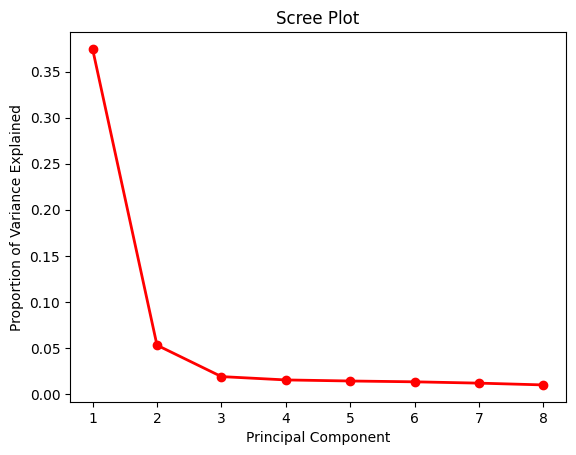

In [ ]:
import matplotlib.pyplot as plt

# plot the significance of each principal component
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca.components_.shape #(8 pcas, 1000 stocks)

(8, 1199)

In [ ]:
# extract the loadings for the first principal component
loadings = pd.DataFrame(pca.components_.T[:, :], index=X.columns, columns=[f'PCA{i+1}' for i in range(n_components)])
for c in loadings.columns:
  loadings[c]-=loadings[c].mean()
  loadings[c]/=loadings[c].std()
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
tic,,,,,,,,
3LMGGF,-1.908488,-0.260807,0.054188,-0.399332,-0.225725,-0.419508,0.426065,0.246519
A,-0.161874,-0.262856,-0.632063,0.045517,0.520509,0.260243,-0.418744,-0.168615
AA,0.994277,-1.354752,0.332785,0.419762,0.023877,0.048399,-0.980952,-0.593680
AAI,0.624621,2.201796,-1.819186,-1.429253,1.090659,0.352107,0.259023,-1.159504
AAP,-0.527536,0.196752,-0.930646,0.019205,-0.064150,0.017714,0.424723,-0.036501
...,...,...,...,...,...,...,...,...
YUM,-0.447965,0.303306,-0.840421,0.488086,-0.066411,0.232841,0.262900,-0.334625
ZBRA,-0.460870,-0.030453,-0.429155,-0.135713,-0.190182,0.229590,-0.456607,0.152767
ZION,1.326103,2.585085,3.864321,0.399568,0.923844,-0.179885,0.593677,1.647193


In [ ]:
loadings.loc[['LEH','AIG','C','FRE','WM','GM']]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
tic,,,,,,,,
LEH,0.971875,1.593316,0.144790,-3.059832,4.106767,-0.426069,-0.853848,6.718197
AIG,1.603347,1.217166,3.316815,-0.214581,4.127462,1.262049,0.759106,0.200573
C,2.104976,1.932792,3.887896,0.046416,1.940286,-0.069324,-1.771735,1.884567
FRE,1.518302,1.934938,2.791888,-2.577832,2.550442,-1.490896,0.257667,1.921731
WM,1.161506,1.991792,3.070960,-4.218671,6.661756,-1.503152,2.199170,6.335144
GM,0.990811,0.840347,-0.027845,-0.816947,1.011093,0.951225,-2.134050,-0.963873


In [ ]:
loadings.loc[['LEH','AIG','C','FRE','WM','GM']].mean()

PCA1    1.391803
PCA2    1.585058
PCA3    2.197417
PCA4   -1.806908
PCA5    3.399634
PCA6   -0.212695
PCA7   -0.257282
PCA8    2.682723
dtype: float64

In [ ]:
loadings.loc[loadings.PCA5>2.5]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
tic,,,,,,,,
AIG,1.603347,1.217166,3.316815,-0.214581,4.127462,1.262049,0.759106,0.200573
CNXT,0.295693,-0.138138,-1.445431,-2.520620,2.621999,-1.818368,-2.402827,0.739663
FED,1.495790,2.030930,3.661468,-5.468411,2.671401,1.117475,1.889921,-2.255323
FNM,1.431872,1.976602,3.057724,-2.941198,2.691493,-1.591593,0.178909,2.029067
FRE,1.518302,1.934938,2.791888,-2.577832,2.550442,-1.490896,0.257667,1.921731
LEH,0.971875,1.593316,0.144790,-3.059832,4.106767,-0.426069,-0.853848,6.718197
LFG,-0.721667,0.405800,0.455573,-5.269198,4.099899,-0.302893,1.982764,-0.716443
MWD,2.011958,0.847032,1.266228,0.447686,2.550658,1.431207,-0.410978,0.733611
NCC,0.364705,1.018980,1.532134,-0.578011,3.941235,1.185525,2.776942,2.537109


In [ ]:
sometics=loadings.loc[loadings.PCA5>2.5].index
result_df=pd.DataFrame(sometics.map(price_2007.set_index('tic')['BusinessDescription'].to_dict()))
result_df.index=sometics
result_df.rename(columns={'tic':'desc'})

,desc
tic,
AIG,"American International Group, Inc. offers insu..."
CNXT,"CNXT Holdings, Inc., a semiconductor and audio..."
FED,FirstFed Financial Corp. went out of business....
FNM,Federal National Mortgage Association provides...
FRE,Federal Home Loan Mortgage Corporation operate...
LEH,"Lehman Brothers Holdings, Inc., through its su..."
LFG,"On December 7, 2009, LandAmerica Financial Gro..."
MWD,"Morgan Stanley, a financial holding company, p..."
NCC,"As of November 6, 2009, National City Corporat..."


# Michael A

* Which stocks were clustered together using PCA, and why?
* What there a cluster that was most indicative of the Global Financial Crisis?

  * PCA5 has a lot of the poor performers
  




The main types of stocks that were clustered together using PCA were stocks in industries that were affected similarly by the GFC. For example, looking at PCA5 shows us a group of stocks from Financial, Mortgage and home based companies.


PCA5 has a lot of bad performing stocks from the financial sector which is why they were all clustered together. They had similar data points.

## Experiment

1. Partition your price dataset into 2-3 parts.
2. Was PCA5 or Leverage an apparent factor at the start or middle of the crisis?

* Our goal right now is to find the next SIVB or the next shoe to drop...
  * SIVB/FRC went to $0
  * What is next.


In [ ]:
#Say in 10/2007 (peak), 5/2008 (middle of the crisis), would you be able to identify bad stocks using PCA/Fundamental factors?
price_2007

,dint,tic,Open,Close,divFactor,Volatility63,Return1,IR21,medianDolVol21,GICS,BusinessDescription,Adj Close,Return
1,20060103,ADCT,22.39,22.59,1.000000,0.027044,0.012097,1.865010,2.699230e+07,45201020,CommScope Connectivity LLC provides broadband ...,22.590000,NaN
1207,20060103,ACS,61.00,61.13,1.000000,0.017894,0.032950,4.700213,4.487390e+07,45102020,"Conduent Business Services, LLC provides digit...",61.130000,NaN
1206,20060103,RS,31.00,31.50,0.747119,0.019329,0.030759,-2.917793,1.563009e+07,15104050,Reliance Steel & Aluminum Co. operates as a di...,23.534239,NaN
1205,20060103,SIRI,6.81,6.52,0.887737,0.024726,-0.026866,-2.164218,3.546662e+08,50201030,"Sirius XM Holdings Inc., an audio entertainmen...",5.788044,NaN
1204,20060103,CLI,42.77,43.47,0.480847,0.009311,0.021142,0.271165,9.611905e+06,60106010,"Veris Residential, Inc.",20.902430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555896,20090529,STT,45.10,46.45,0.757055,0.076417,0.039382,4.198412,4.900203e+08,40203010,"State Street Corporation, through its subsidia...",35.165188,0.039382
1555895,20090529,SWK,34.82,35.70,0.729057,0.038731,0.034783,-1.518909,3.293277e+07,20106020,"Stanley Black & Decker, Inc. engages in the to...",26.027319,0.034783
1555894,20090529,SPF,12.20,12.20,0.990276,0.092540,0.000000,4.162792,4.270558e+06,25201030,"CalAtlantic Group, Inc. operates as a homebuil...",12.081362,0.000000
1555901,20090529,SUN,29.74,30.43,0.775855,0.033547,0.041767,3.520032,1.189701e+08,10102030,"Sunoco, Inc., through its subsidiaries, refine...",23.609256,0.041767


In [ ]:
#Identify bad stocks using PCA / Fundamental factors

#Split price dataset into 2 or 3 parts
price_2007_1 = price_2007.iloc[:int(len(price_2007)/2),:]
price_2007_2 = price_2007.iloc[int(len(price_2007)/2):,:]

price_2007_1

,dint,tic,Open,Close,divFactor,Volatility63,Return1,IR21,medianDolVol21,GICS,BusinessDescription,Adj Close,Return
1,20060103,ADCT,22.39,22.59,1.000000,0.027044,0.012097,1.865010,2.699230e+07,45201020,CommScope Connectivity LLC provides broadband ...,22.590000,NaN
1207,20060103,ACS,61.00,61.13,1.000000,0.017894,0.032950,4.700213,4.487390e+07,45102020,"Conduent Business Services, LLC provides digit...",61.130000,NaN
1206,20060103,RS,31.00,31.50,0.747119,0.019329,0.030759,-2.917793,1.563009e+07,15104050,Reliance Steel & Aluminum Co. operates as a di...,23.534239,NaN
1205,20060103,SIRI,6.81,6.52,0.887737,0.024726,-0.026866,-2.164218,3.546662e+08,50201030,"Sirius XM Holdings Inc., an audio entertainmen...",5.788044,NaN
1204,20060103,CLI,42.77,43.47,0.480847,0.009311,0.021142,0.271165,9.611905e+06,60106010,"Veris Residential, Inc.",20.902430,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
784808,20070830,HMC,31.67,31.85,0.722703,0.012249,-0.020000,-6.506013,2.847142e+07,25102010,"Honda Motor Co., Ltd. develops, manufactures, ...",23.018101,-0.020000
784806,20070830,HD,36.39,37.04,0.673362,0.018486,0.013406,-0.178278,1.020065e+09,25504030,"The Home Depot, Inc. operates as a home improv...",24.941330,0.013406
784805,20070830,HOC,32.60,32.90,0.550801,0.029364,0.006578,0.761233,5.564520e+07,10102030,HF Sinclair Corporation operates as an indepen...,18.121355,0.006578
784795,20070830,HCN,39.13,39.89,0.460959,0.015822,0.016565,4.744143,3.587945e+07,60105010,"Welltower Inc. (NYSE:WELL), an S&P 500 company...",18.387651,0.016565


In [ ]:
price_2007_2

,dint,tic,Open,Close,divFactor,Volatility63,Return1,IR21,medianDolVol21,GICS,BusinessDescription,Adj Close,Return
784802,20070830,HXL,20.89,21.40,0.946268,0.028369,0.010387,0.012898,2.549313e+07,20101010,"Hexcel Corporation develops, manufactures, and...",20.250138,0.010387
784801,20070830,HPQ,48.05,48.44,0.315135,0.015525,0.000413,1.415418,8.226251e+08,45202030,HP Inc. provides personal computing and other ...,15.265159,0.000413
784800,20070830,HSY,45.73,46.14,0.686038,0.015785,-0.002594,0.222357,7.022867e+07,30202030,"The Hershey Company, together with its subsidi...",31.653782,-0.002594
784799,20070830,HPC,20.81,20.61,0.987097,0.021572,-0.015289,-0.187016,4.246920e+07,15101020,Hercules LLC manufactures and markets chemical...,20.344064,-0.015289
784798,20070830,HP,31.10,30.96,0.617454,0.021904,-0.017143,-1.294186,4.384625e+07,10101010,"Helmerich & Payne, Inc., together with its sub...",19.116389,-0.017143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555896,20090529,STT,45.10,46.45,0.757055,0.076417,0.039382,4.198412,4.900203e+08,40203010,"State Street Corporation, through its subsidia...",35.165188,0.039382
1555895,20090529,SWK,34.82,35.70,0.729057,0.038731,0.034783,-1.518909,3.293277e+07,20106020,"Stanley Black & Decker, Inc. engages in the to...",26.027319,0.034783
1555894,20090529,SPF,12.20,12.20,0.990276,0.092540,0.000000,4.162792,4.270558e+06,25201030,"CalAtlantic Group, Inc. operates as a homebuil...",12.081362,0.000000
1555901,20090529,SUN,29.74,30.43,0.775855,0.033547,0.041767,3.520032,1.189701e+08,10102030,"Sunoco, Inc., through its subsidiaries, refine...",23.609256,0.041767


In [ ]:
sometics = loadings.loc[loadings.PCA1>2.5].index
result_df=pd.DataFrame(sometics.map(price_2007.set_index('tic')['BusinessDescription'].to_dict()))
result_df.index=sometics
result_df.rename(columns={'tic':'desc'})

# Financial and housing corps, again!

,desc
tic,
ABK,"Ambac Financial Group, Inc., a financial servi..."
AMBC,"Ambac Financial Group, Inc., a financial servi..."
BZH,"Beazer Homes USA, Inc. operates as a homebuild..."
CBG,"CBRE Group, Inc. operates as a commercial real..."
CENX,"Century Aluminum Company, together with its su..."
CIT,"As of January 3, 2022, CIT Group Inc. was acqu..."
CNO,"CNO Financial Group, Inc., through its subsidi..."
DDR,SITE Centers is an owner and manager of open-a...
GNW,"Genworth Financial, Inc. provides insurance pr..."


CEOs were maximizing leverage between 2002-2007. The leverage meltdown  shows that leverage was an apparent factor throughout the beginning and middle of crisis. 





In [ ]:
# first identify how to view one tiny piece of PCA5
early_aig = price_2007_1.loc[price_2007_1['tic']=='AIG']
early_aig.plot(x='dint',y='Return1')

In [ ]:
# now do it for all

# interchangeable stock to test factor
stock_to_view = 'FRE'

xpca5 = loadings[loadings['PCA5']>2.5].index
early_xpca5 = price_2007_1[price_2007_1['tic'].isin(xpca5)]
early_xpca5[early_xpca5['tic']==stock_to_view].plot(x='dint',y='Return1')

In [ ]:
xpca5 = loadings[loadings['PCA5']>2.5].index
late_xpca5 = price_2007_2[price_2007_2['tic'].isin(xpca5)]
late_xpca5[late_xpca5['tic']==stock_to_view].plot(x='dint',y='Return1')

According to PCA analysis, PCA5 had erratic changes in features, such as returns, during the middle of the crisis. This may prove that there was panic amongst financial stocks

# 5 - Compare and Constrast to 2023

* What are the factor returns from 2022-2023?
* What stocks are heavily clustered together from 2022-2023?
* Does the situation resemble 2008?



#Michael A


In [ ]:
factor_model_2007.plot(kind='hist')

In [ ]:
# factor returns for 2022-2023: 'Size',	'Ret',	'Yield',	'Activity',	'Growth',	'Leverage',	'Momentum',	'Variability',	'Volatility',	'Value'	,'Profit'
blgdf[['Size',	'Ret',	'Yield',	'Activity',	'Growth',	'Leverage',	'Momentum',	'Variability',	'Volatility',	'Value'	,'Profit']].plot(kind='hist')

Stocks with near 0 returns and yields of -0.8 seem to be clustered together from 2022-2023.

Yes, there is some resemblance between 2007 and 2022. However, 2022-2023 shows more evidence of stocks with positive factors accross the board, however there is a significant amount of negative values just like in 2007-2008.  The economy in 2022-2023 is not as drastically negative as it was in 2007-2008, but there are significant similarities to drops in factors between both economic timeframes.

# 6 - Finance only: How would you navigate the Global Financial Crisis?

Portfolio Optimization:
1. Covariance matrix based on the first half of the data, say 2006-2007.
2. An alpha model assuming you had some foresight. For example, you can choose to short leverage and long profitability as per above example.
3. Optimize a market neutral model such as the sum of the positive weights = 1, and the sum of the negative weights = -1, with the highest IR (i.e. ratio of portfolio alpha/portfolio risk)
4. Apply reasonable constraints such as maximum weight to any given stock or industry. (i.e. Not 100% short LEH and 100% long AAPL)
5. Compare optimizer, monte carlo and genetic algorithm outputs and computing performances.


## See Minimum Variance (Monte Carlo, Optimizer, Genetic Algo)
  * Python Notebook: https://colab.research.google.com/drive/19_8ZmK7tf0vb7dZuzzWm_sCvJG7qgn3b?usp=sharing
  * Lecture Video: https://tinyurl.com/minvarport


In [ ]:
X= pivot_table.fillna(0).clip(-0.4,0.4) #To do: determine the best trimming
commontics=list(set(factor_model_2007.index).intersection(X.columns))


In [ ]:
firsthalf=X.loc[:,commontics].head(500)
secondhalf=X.loc[:,commontics].tail(-500)

In [ ]:
# For example, say we have the foresight to know that leverage is the big loser in 2008.

alpha = -1 * factor_model_2007['Blg Leverage'] #To do: determine your alpha model
alpha = alpha.loc[commontics]

In [ ]:
sampleCov=firsthalf.cov()
sampleCov

tic,TXN,NTAP,HCBK,DF,RHI,AOC,EXPE,SLG,TDW,DRQ,...,WSM,OSI,AQNT,ALTR,FMD,CNB,HLT,ESS,ROST,MUR
tic,,,,,,,,,,,,,,,,,,,,,
TXN,0.000272,0.000141,0.000053,0.000054,0.000113,0.000083,0.000048,0.000057,0.000095,0.000108,...,0.000085,0.000029,0.000082,0.000176,0.000037,0.000074,0.000057,0.000061,0.000101,0.000085
NTAP,0.000141,0.000568,0.000062,0.000067,0.000161,0.000105,0.000097,0.000127,0.000124,0.000162,...,0.000117,0.000045,0.000135,0.000180,0.000167,0.000144,0.000106,0.000127,0.000157,0.000108
HCBK,0.000053,0.000062,0.000146,0.000036,0.000075,0.000057,0.000016,0.000074,0.000033,0.000058,...,0.000085,0.000013,0.000046,0.000072,0.000088,0.000104,0.000032,0.000082,0.000067,0.000053
DF,0.000054,0.000067,0.000036,0.000221,0.000062,0.000031,0.000036,0.000055,0.000069,0.000047,...,0.000056,0.000021,0.000038,0.000045,0.000006,0.000057,0.000040,0.000048,0.000058,0.000049
RHI,0.000113,0.000161,0.000075,0.000062,0.000368,0.000083,0.000071,0.000107,0.000120,0.000149,...,0.000126,0.000041,0.000141,0.000137,0.000088,0.000121,0.000091,0.000099,0.000152,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNB,0.000074,0.000144,0.000104,0.000057,0.000121,0.000072,0.000040,0.000104,0.000060,0.000067,...,0.000115,0.000017,0.000053,0.000097,0.000102,0.000276,0.000049,0.000119,0.000120,0.000069
HLT,0.000057,0.000106,0.000032,0.000040,0.000091,0.000040,0.000038,0.000087,0.000074,0.000090,...,0.000085,0.000049,0.000116,0.000088,0.000070,0.000049,0.000332,0.000082,0.000086,0.000052
ESS,0.000061,0.000127,0.000082,0.000048,0.000099,0.000055,0.000051,0.000183,0.000071,0.000108,...,0.000106,0.000019,0.000051,0.000088,0.000092,0.000119,0.000082,0.000221,0.000091,0.000056


For Monte Carlo, we need a large number of samples for s Monte Carlo simulation...


In [ ]:
n_samples = 50000
riskfree = 0.01
monteWeights = np.random.dirichlet(np.ones(len(alpha)), n_samples)
monteWeights.shape #Each row represents a random sample of a 91 dimensional dirichlet distribution with alphas all set to 1 (uniformative prior)

(50000, 880)

In [ ]:
exprets = monteWeights.dot(alpha)

In [ ]:
exp_variances=(monteWeights.T * (sampleCov @ monteWeights.T)).sum(axis=0)
exp_variances.shape


(50000,)

In [ ]:
stds = np.sqrt(exp_variances)

In [ ]:
sharpes = (exprets-riskfree) / stds

print("Sample portfolio min vol:", stds.min())
print("Sample portfolio max sharpe:", sharpes.max())

Sample portfolio min vol: 0.008984941440389365
Sample portfolio max sharpe: 33.910429224976994


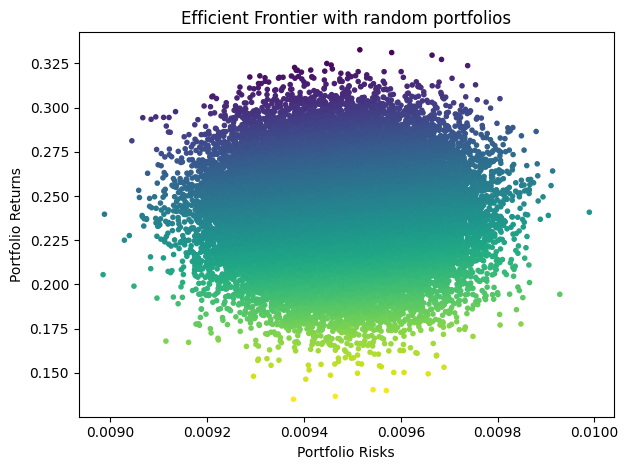

In [ ]:
fig, ax = plt.subplots()
ax.scatter(stds, exprets, marker=".", c=sharpes, cmap="viridis_r")
ax.set_title("Efficient Frontier with random portfolios")

X=np.arange(stds.min(),stds.max(),0.01)
y=riskfree + sharpes.max()*X
ax.plot(X,y,color='red')

plt.ylabel('Portfolio Returns')
plt.xlabel('Portfolio Risks')

plt.tight_layout()
plt.show()


## Long only example

* Decide which portfolio you would trade on 2007-12-28 given your view on covariance (naive view right now, it is just the sample covariance), and your view on alpha.
* Repeat for short-only
* Repeat for market neutral - say 100% long vs 100% short.
* Plot the returns after your portfolio formation date on 2007-12-28
* Determine if your strategy worked, and refine your strategy.


In [ ]:
secondhalf

tic,TXN,NTAP,HCBK,DF,RHI,AOC,EXPE,SLG,TDW,DRQ,...,WSM,OSI,AQNT,ALTR,FMD,CNB,HLT,ESS,ROST,MUR
dint,,,,,,,,,,,,,,,,,,,,,
20071228,-0.004459,0.000000,-0.006048,0.007359,0.020779,-0.007237,-0.001252,-0.035658,-0.000889,0.018590,...,-0.013288,0.0,0.0,-0.004126,-0.041901,-0.017037,0.0,-0.021150,0.003962,0.017761
20071231,-0.002687,-0.014218,0.015551,-0.005767,-0.017085,-0.006665,-0.009398,0.025455,-0.023843,-0.041667,...,-0.003463,0.0,0.0,0.000518,-0.001305,0.020347,0.0,0.022551,0.009077,-0.006325
20080102,-0.031437,-0.013622,-0.013316,-0.012374,-0.054734,-0.026211,-0.033839,-0.009630,0.033175,-0.004671,...,-0.038224,0.0,0.0,-0.040890,-0.008497,-0.008124,0.0,-0.017233,-0.021901,0.011905
20080103,-0.021947,0.017465,-0.000675,-0.006265,-0.039124,-0.007752,0.000327,-0.035436,-0.007586,0.027798,...,-0.033721,0.0,0.0,0.011873,-0.050099,-0.026061,0.0,-0.039766,-0.029588,-0.032848
20080104,-0.035082,-0.026347,-0.016205,-0.034673,-0.024837,-0.013238,-0.032723,-0.027330,-0.029867,-0.018792,...,-0.022019,0.0,0.0,-0.036267,-0.069396,-0.049694,0.0,-0.046304,-0.046560,-0.020475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090522,0.030067,0.032438,0.007799,-0.001070,-0.012318,-0.021954,0.018380,0.015333,0.000911,-0.001017,...,0.015789,0.0,0.0,0.014230,-0.022599,-0.021739,0.0,-0.020138,0.006975,0.000544
20090526,0.027027,0.079632,0.067928,0.014462,0.015242,0.020202,0.066176,0.105710,0.034349,0.035132,...,0.059585,0.0,0.0,0.035714,0.092486,0.096296,0.0,0.069204,0.016162,0.027370
20090527,-0.001053,-0.035625,-0.038647,-0.007920,-0.036852,-0.030253,-0.023824,-0.081093,0.005498,0.000984,...,-0.003260,0.0,0.0,0.009236,-0.089947,-0.060811,0.0,-0.027632,-0.015905,-0.008821


## Now give a recommendation on the best market neutral portfolio in 2023.

* Balance alpha and volatility
* Where alpha is your views on which factors will outperform and underperform
* Where volatility is based on your covariance matrix.



## You can also use GICS for above.


# 7 - Finance only: Detect the GFC?

Markov switching dynamic regression models:
1. Apply a Markov switching dynamic regression models on 2007-2009 to see if there a several regimes that might be triggered as the crisis unfolded.
2. What factors were affected by the adverse regime?
3. When did the crisis end according to the regime model?


## See Markov switching dynamic regression models (Are we in a Recession?)
  * Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html
  * Python Notebook: https://colab.research.google.com/drive/1yTNDhBgqSiyycF-MTVsVaAfQuTnDHy4Z?usp=sharing
  * Lecture Video: https://tinyurl.com/markovswitch
